Mini projeto MLP-CNN realizado para a cadeira de Redes Neurais

Equipe:

Caio Bezerra

Marcos André

Maria Clara Kenderessy

Pedro Queiroz

# MLP

Abaixo é onde importamos todas as dependências utilizadas no projeto, incluindo diversas funções do sklearn usadas, com destaque para o classificador do MLP e Grid Search, que explicaremos mais para frente, além de importar o MNIST.

### Dependências

In [ ]:
from load_mnist import load_data
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV


Inicialmente, carregamos a base de dados e fizemos a devida separação dos dados para então treinarmos um modelo inicial, esse modelo utiliza os parâmetros default do sklearn.

### Modelo Inicial

In [ ]:
training_data, validation_data, test_data = load_data()
training_data = list(training_data)
test_data = list(test_data)

In [ ]:
X_train, X_test, y_train, y_test = training_data[0], test_data[0], training_data[1], test_data[1]

In [ ]:
clf = MLPClassifier().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
for cls in np.unique(y_test):
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Accuracy for class {cls}: {acc:.2f}")

Accuracy for class 0: 0.99
Accuracy for class 1: 0.99
Accuracy for class 2: 0.98
Accuracy for class 3: 0.97
Accuracy for class 4: 0.97
Accuracy for class 5: 0.97
Accuracy for class 6: 0.98
Accuracy for class 7: 0.97
Accuracy for class 8: 0.97
Accuracy for class 9: 0.97


In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



É possível notar que o modelo com os parâmetros de forma padrão já consegue uma performance excelente nos dados de teste, porém, isso é alcançado utilizando um número muito grande de camadas (100, por padrão), portanto, decidimos rodar um grid search para ver se conseguíamos uma performance tão boa quanto ou melhor com um modelo mais simplificado.

### Grid Search

Aqui definimos quais parâmetros seriam testados com o grid search para termos como retorno quais combinações alcançavam um bom desempenho.

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(30,), (50,), (100,), (30, 30), (50, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],

}

In [ ]:

clf_tuned = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
clf_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30,), (50,), (100,), (30, 30),
                                                (50, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd']})

In [ ]:
results = clf_tuned.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Accuracy:", mean_score, "Params:", params)

best_params = clf_tuned.best_params_
bestscore = clf_tuned.best_score_

print("Best parameters:", best_params)
print("Best score:", bestscore)

Accuracy: 0.94946 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'solver': 'adam'}
Accuracy: 0.92018 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'solver': 'sgd'}
Accuracy: 0.94852 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01, 'solver': 'adam'}
Accuracy: 0.9562200000000001 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01, 'solver': 'sgd'}
Accuracy: 0.9241800000000001 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.1, 'solver': 'adam'}
Accuracy: 0.9563 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.1, 'solver': 'sgd'}
Accuracy: 0.96132 Params: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'}
Accuracy: 0.9209200000000001 Params: {'activation': 'logistic', 'hidden_layer_sizes':

Acima está listado todas as possibilidades iteradas pelo grid search e suas acurácias. Como esperado, o modelo utilizando um grande número de neurônios acabou também tendo a melhor performance, porém outros ainda eficientes e mais simples também foram alcançados. Abaixo, implementamos alguns modelos com os parâmetros que se destacaram para nós ao analisar o resultado do grid search.

### Piores resultados

O modelo abaixo foi o que obteve a pior acurácia, que pode ser explicado por apresentar um número baixo de neurônios. A partir disso decidimos experimentar como poderíamos melhorar os resultados desse modelo mantendo um número baixo de neurônios.

In [ ]:
clf1 = MLPClassifier(activation='relu', hidden_layer_sizes=(30, 30), learning_rate_init=0.1, solver='adam').fit(X_train, y_train)
y_pred = clf1.predict(X_test)
ac1 = clf1.score(X_test, y_test)

for cls in np.unique(y_test):
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Accuracy for class {cls}: {acc:.2f}")

print()
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy for class 0: 0.51
Accuracy for class 1: 0.93
Accuracy for class 2: 0.85
Accuracy for class 3: 0.65
Accuracy for class 4: 0.90
Accuracy for class 5: 0.77
Accuracy for class 6: 0.57
Accuracy for class 7: 0.85
Accuracy for class 8: 0.78
Accuracy for class 9: 0.82

              precision    recall  f1-score   support

           0       1.00      0.51      0.68       980
           1       1.00      0.93      0.96      1135
           2       0.63      0.85      0.73      1032
           3       0.92      0.65      0.76      1010
           4       0.69      0.90      0.78       982
           5       0.73      0.77      0.75       892
           6       0.89      0.57      0.70       958
           7       0.95      0.85      0.90      1028
           8       0.49      0.78      0.60       974
           9       0.82      0.82      0.82      1009

    accuracy                           0.77     10000
   macro avg       0.81      0.76      0.77     10000
weighted avg       0.81  

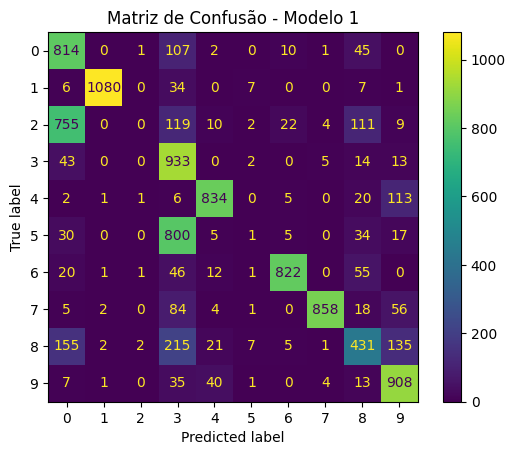

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.title('Matriz de Confusão - Modelo 1')
plt.show()


### Melhorando resultados ao modificar solver

Comparando também com os resultados do grid search, notamos que ao apenas trocar a função de otimização, ou "solver" de adam para sgd obtivemos uma grande melhoria na acurácia ainda mantendo um número baixo de neurônios. Notamos que essa diferença provavelmente está relacionada com o valor mais alto da taxa de aprendizagem (0.1), na qual o sgd aparenta trabalhar melhor devida a sua natureza de realizar atualizações mais significativas a cada iteração. 

In [ ]:
clf2 = MLPClassifier(activation='relu', hidden_layer_sizes=(30, 30), learning_rate_init=0.1, solver='sgd').fit(X_train, y_train)
y_pred = clf2.predict(X_test)
ac2 = clf2.score(X_test, y_test)

for cls in np.unique(y_test):
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Accuracy for class {cls}: {acc:.2f}")

print()

class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy for class 0: 0.99
Accuracy for class 1: 0.99
Accuracy for class 2: 0.95
Accuracy for class 3: 0.97
Accuracy for class 4: 0.97
Accuracy for class 5: 0.96
Accuracy for class 6: 0.98
Accuracy for class 7: 0.96
Accuracy for class 8: 0.94
Accuracy for class 9: 0.93

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.96      0.95       892
           6       0.96      0.98      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.94      0.94      0.94       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97  

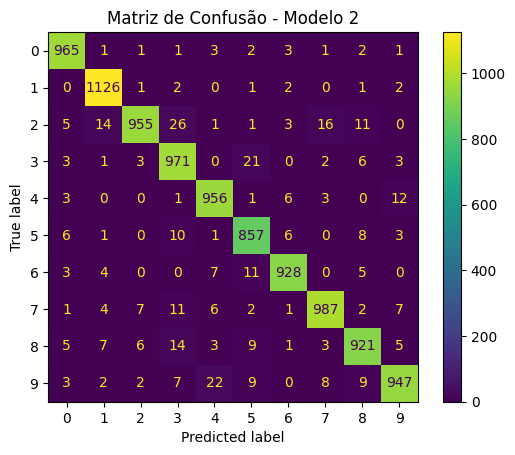

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.title('Matriz de Confusão - Modelo 2')
plt.show()


### Melhores resultados

Notamos que o modelo acima já estava com um desempenho muito bom, mesmo com uma quantidade de neurônios bem menor do que a do modelo padrão do rn que já apresenta um ótimo resultado. Ao observar o grid search notamos então que a única evolução possível seria apenas com o aumento do número de camadas, e de fato comprovamos isso com o último modelo listado abaixo. Ele apresenta um desempenho extremamente semelhante ao excelente modelo padrão do sklearn, mesmo com metade das camadas.

In [ ]:
clf3 = MLPClassifier(activation='relu', hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver='sgd').fit(X_train, y_train)
y_pred = clf3.predict(X_test)
ac3 = clf3.score(X_test, y_test)

for cls in np.unique(y_test):
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Accuracy for class {cls}: {acc:.2f}")

print()

class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy for class 0: 0.99
Accuracy for class 1: 0.99
Accuracy for class 2: 0.97
Accuracy for class 3: 0.97
Accuracy for class 4: 0.98
Accuracy for class 5: 0.96
Accuracy for class 6: 0.96
Accuracy for class 7: 0.96
Accuracy for class 8: 0.97
Accuracy for class 9: 0.96

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.94      0.97      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.99      0.96      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97  

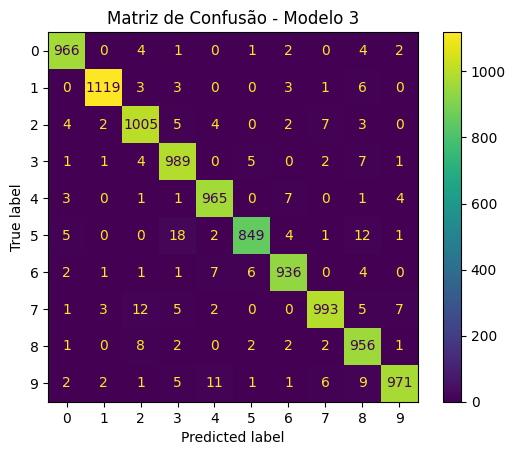

In [ ]:
cm3 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.title('Matriz de Confusão - Modelo 3')
plt.show()

# Análise final

Mesmo tendo como base um modelo com uma performance muito boa, através do grid search conseguimos encontrar parâmetros que obtiveram uma performance bem semelhante utilizando menos camadas e número de neurônios, o que acabou sendo o objetivo da nossa experimentação e nos deixou muito satisfeitos com o resultado.

# CNN

Para o CNN fomos com uma mentalidade semelhante, inicializar um modelo padrão da biblioteca e então ao realizar uma otimização de parâmetros para analisarmos o que seria modelos e parâmetros apropriados com bom desempenho.

# Dependências

In [ ]:
from load_mnist import load_data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf

from objectivefunc import model_function, other_params_model
import optuna

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Para iniciar, fizemos a separação dos dados do MNIST e então a definição do modelo inicial utilizando algum dos parâmetros padrões oferecidos pelo tensorflow como pode ser observado abaixo.

# Modelo Inicial

In [ ]:
learning_rate = 0.001
epochs = 5
num_classes = 10

In [ ]:
training_data, validation_data, test_data = load_data()
training_data = list(training_data)
test_data = list(test_data)

In [ ]:
X_train, X_test, y_train, y_test = training_data[0], test_data[0], training_data[1], test_data[1]

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),  
  tf.keras.layers.Dense(units=num_classes, activation='relu'),
  tf.keras.layers.Dense(units=num_classes, activation='softmax') 
])

model.compile(loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=epochs)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7599 - loss: 0.7610
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9585 - loss: 0.1325
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9702 - loss: 0.0917
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0699
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9795 - loss: 0.0643


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0708
Test Accuracy: 0.9811999797821045


In [ ]:
predictions = model.predict(X_test)

predicted_labels = predictions.argmax(axis=1)

cm = confusion_matrix(y_test, predicted_labels)

for i in range(num_classes):
  accuracy = cm[i, i] / cm[i, :].sum()
  print(f"Accuracy for class {i}: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy for class 0: 0.9929
Accuracy for class 1: 0.9921
Accuracy for class 2: 0.9835
Accuracy for class 3: 0.9733
Accuracy for class 4: 0.9786
Accuracy for class 5: 0.9809
Accuracy for class 6: 0.9864
Accuracy for class 7: 0.9805
Accuracy for class 8: 0.9743
Accuracy for class 9: 0.9683


In [ ]:
predicted_labels = predictions.argmax(axis=1)

report = classification_report(y_test, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



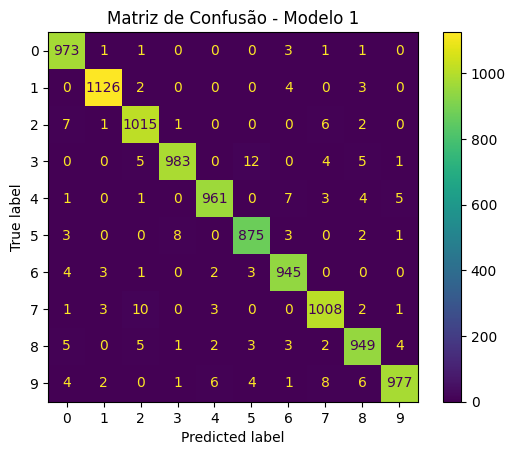

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão - Modelo 1')
plt.show()


Podemos analisar que mesmo sendo um modelo sem muito pensamento por trás e até com valores mais reduzidos, ele já apresentou uma acurácia bem elevada passada 5 epochs.

A partir disso, para entender melhor a atuação e impacto de cada parâmetro, fomos atrás de realizar uma otimização deles utilizando o Optuna, realizamos dois estudos diferentes contendo conjuntos diferentes e buscamos selecionar e gerar modelos com parâmetros interessantes quando comparados ao modelo original.

# Otimização de parâmetros com Optuna

#### Estudo 1: Learning Rate, Epochs, Batch Size, No. of filters, Dense Units

Nesse primeiro estudo decidimos variar a taax de aprendizagem, quantidade de épocas, tamanho do batch, número de filtro e unidades da densidade. Abaixo está o intervalo escolhido para a variação de cada parâmetro e o devido estudo e seus resultados.

Essas duas funções definidas abaixo foram as responsáveis por realizar a otimização dos parâmetros com o uso do Optuna

In [ ]:
import tensorflow as tf
from load_mnist import load_data


num_classes = 10

def model_function(trial):
    num_filters = trial.suggest_categorical('num_filters', [32, 64, 128])
    filter_size = trial.suggest_categorical('filter_size', [3, 5])
    stride = trial.suggest_categorical('stride', [1, 2])
    padding = trial.suggest_categorical('padding', ['valid', 'same'])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5, step=0.1)
    pool_size = trial.suggest_categorical('pool_size', [2, 3])

    training_data, validation_data, test_data = load_data()
    training_data = list(training_data)
    test_data = list(test_data)

    X_train, X_test, y_train, y_test = training_data[0], test_data[0], training_data[1], test_data[1]

    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=num_filters, kernel_size=(filter_size, filter_size), activation='relu', 
                                     strides=(stride, stride), padding=padding, input_shape=(28, 28, 1)))
    current_shape = (28, 28)
    if padding == 'valid':
        current_shape = ((current_shape[0] - filter_size + stride) // stride, 
                         (current_shape[1] - filter_size + stride) // stride)
    else:
        current_shape = ((current_shape[0] + stride - 1) // stride, 
                         (current_shape[1] + stride - 1) // stride)

    if all(dim >= pool_size for dim in current_shape):
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size)))
        current_shape = (current_shape[0] // pool_size, current_shape[1] // pool_size)

    model.add(tf.keras.layers.Conv2D(filters=num_filters * 2, kernel_size=(filter_size, filter_size), activation='relu', 
                                     strides=(stride, stride), padding=padding))
    
    if padding == 'valid':
        current_shape = ((current_shape[0] - filter_size + stride) // stride, 
                         (current_shape[1] - filter_size + stride) // stride)
    else:
        current_shape = ((current_shape[0] + stride - 1) // stride, 
                         (current_shape[1] + stride - 1) // stride)

    if all(dim >= pool_size for dim in current_shape):
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size)))
        current_shape = (current_shape[0] // pool_size, current_shape[1] // pool_size)

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))


    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )


    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    return accuracy


def other_params_model(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    epochs = trial.suggest_int('epochs', 5, 20)
    batch_size = trial.suggest_int('batch_size', 32, 128)
    num_filters = trial.suggest_categorical('num_filters', [32, 64, 128])
    dense_units = trial.suggest_int('dense_units', 64, 256)

    training_data, validation_data, test_data = load_data()
    training_data = list(training_data)
    test_data = list(test_data)

    X_train, X_test, y_train, y_test = training_data[0], test_data[0], training_data[1], test_data[1]

    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=num_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=num_filters * 2, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(units=dense_units, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax') 
    ])

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    return accuracy


Abaixo o destaque do trecho do código referente ao intervalo informado à ser variado e observado pelo Optuna para o primeiro estudo.

In [ ]:
learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
epochs = trial.suggest_int('epochs', 5, 20)
batch_size = trial.suggest_int('batch_size', 32, 128)
num_filters = trial.suggest_categorical('num_filters', [32, 64, 128])
dense_units = trial.suggest_int('dense_units', 64, 256)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(other_params_model, n_trials=10)

[I 2024-05-20 23:14:39,412] A new study created in memory with name: no-name-68045c57-fcb9-45a7-81b9-86ae609308b0
[I 2024-05-20 23:16:03,898] Trial 0 finished with value: 0.9851999878883362 and parameters: {'learning_rate': 0.007949254734482034, 'epochs': 8, 'batch_size': 106, 'num_filters': 32, 'dense_units': 196}. Best is trial 0 with value: 0.9851999878883362.
[I 2024-05-20 23:32:30,732] Trial 1 finished with value: 0.9907000064849854 and parameters: {'learning_rate': 0.0011090093878667155, 'epochs': 14, 'batch_size': 44, 'num_filters': 128, 'dense_units': 167}. Best is trial 1 with value: 0.9907000064849854.
[I 2024-05-20 23:42:06,683] Trial 2 finished with value: 0.9901999831199646 and parameters: {'learning_rate': 0.00034388105147047066, 'epochs': 9, 'batch_size': 57, 'num_filters': 128, 'dense_units': 73}. Best is trial 1 with value: 0.9907000064849854.
[I 2024-05-20 23:43:57,753] Trial 3 finished with value: 0.9793999791145325 and parameters: {'learning_rate': 9.426207367184762

Aqui podemos observar como houve modelos que atingiram uma alta acurácia, até mesmo superando o modelo padrão.

In [ ]:
for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  - Parameters: {trial.params}")
    print(f"  - Metric value: {trial.value}\n")


Trial 0:
  - Parameters: {'learning_rate': 0.007949254734482034, 'epochs': 8, 'batch_size': 106, 'num_filters': 32, 'dense_units': 196}
  - Metric value: 0.9851999878883362

Trial 1:
  - Parameters: {'learning_rate': 0.0011090093878667155, 'epochs': 14, 'batch_size': 44, 'num_filters': 128, 'dense_units': 167}
  - Metric value: 0.9907000064849854

Trial 2:
  - Parameters: {'learning_rate': 0.00034388105147047066, 'epochs': 9, 'batch_size': 57, 'num_filters': 128, 'dense_units': 73}
  - Metric value: 0.9901999831199646

Trial 3:
  - Parameters: {'learning_rate': 9.426207367184762e-05, 'epochs': 5, 'batch_size': 88, 'num_filters': 64, 'dense_units': 118}
  - Metric value: 0.9793999791145325

Trial 4:
  - Parameters: {'learning_rate': 0.002818643058613451, 'epochs': 7, 'batch_size': 71, 'num_filters': 32, 'dense_units': 163}
  - Metric value: 0.9873999953269958

Trial 5:
  - Parameters: {'learning_rate': 1.9200968516406505e-05, 'epochs': 15, 'batch_size': 91, 'num_filters': 64, 'dense_uni

# Melhor modelo após o primeiro estudo

Após observar os parâmetros que obtiveram a melhor acurácia, implementamos esse modelo como sugerido.

In [ ]:
params = {
    'learning_rate': 0.0011090093878667155,
    'epochs': 14,
    'batch_size': 44,
    'num_filters': 128,
    'dense_units': 167
}

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=params['num_filters'], kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=params['num_filters'] * 2, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=params['dense_units'], activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax')
    ])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=params['learning_rate']),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2, verbose=1)

Epoch 1/14
910/910 [==============================] - 85s 92ms/step - loss: 0.1331 - accuracy: 0.9579 - val_loss: 0.1241 - val_accuracy: 0.9593
Epoch 2/14
910/910 [==============================] - 83s 91ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0511 - val_accuracy: 0.9835
Epoch 3/14
910/910 [==============================] - 83s 91ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0537 - val_accuracy: 0.9842
Epoch 4/14
910/910 [==============================] - 81s 89ms/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.0433 - val_accuracy: 0.9873
Epoch 5/14
910/910 [==============================] - 78s 86ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0699 - val_accuracy: 0.9828
Epoch 6/14
910/910 [==============================] - 78s 86ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0978 - val_accuracy: 0.9780
Epoch 7/14
910/910 [==============================] - 80s 88ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0539 - val_accuracy:

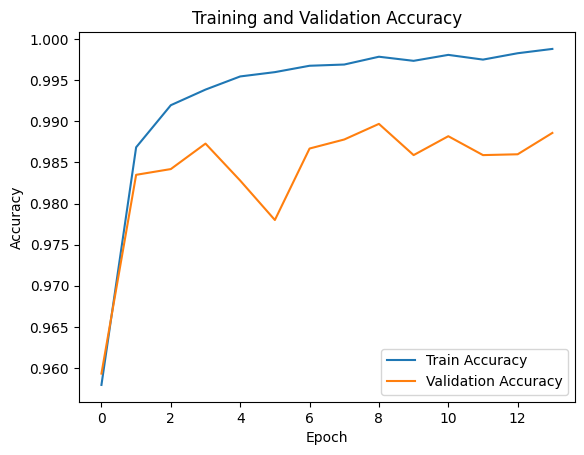

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

313/313 [==============================] - 4s 14ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



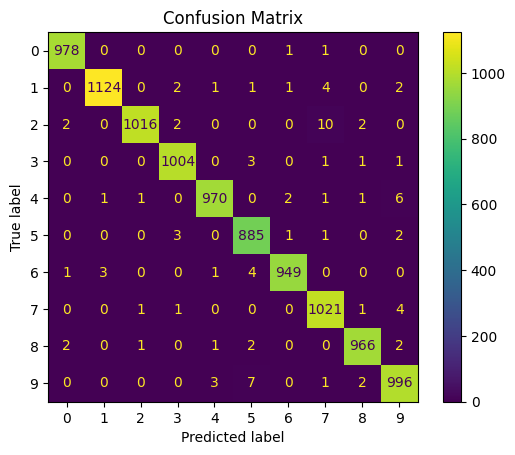

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


Como podemos observar, o modelo obteve realmente uma acurácia extremamente alta e desempenhou muito bem mesmo sem ter um número exagerado de camadas ou filtros, tudo com resultados obtidos após o estudo do Optuna.

#### Estudo 2: No. of filters, Filter size, Padding, Dropout Rate, Pool size

Para o segundo estudo, decidimos variar o número de filtros, tamanho da janela de convulação, padding, dropout e pooling. Abaixo os valores de intervalo escolhidos para cada parâmetros como exibido nas funções definidas anteriormente.

In [ ]:
num_filters = trial.suggest_categorical('num_filters', [32, 64, 128])
filter_size = trial.suggest_categorical('filter_size', [3, 5])
stride = trial.suggest_categorical('stride', [1, 2])
padding = trial.suggest_categorical('padding', ['valid', 'same'])
dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5, step=0.1)
pool_size = trial.suggest_categorical('pool_size', [2, 3])

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(model_function, n_trials=10)

[I 2024-05-21 13:20:37,117] A new study created in memory with name: no-name-9fed91ce-0f71-4911-afe7-a33ab898e959
[I 2024-05-21 13:21:36,580] Trial 0 finished with value: 0.9804999828338623 and parameters: {'num_filters': 64, 'filter_size': 3, 'stride': 2, 'padding': 'valid', 'dropout_rate': 0.1, 'pool_size': 2}. Best is trial 0 with value: 0.9804999828338623.
[I 2024-05-21 13:28:05,435] Trial 1 finished with value: 0.9864000082015991 and parameters: {'num_filters': 128, 'filter_size': 5, 'stride': 2, 'padding': 'same', 'dropout_rate': 0.1, 'pool_size': 3}. Best is trial 1 with value: 0.9864000082015991.
[I 2024-05-21 13:29:37,513] Trial 2 finished with value: 0.9904000163078308 and parameters: {'num_filters': 32, 'filter_size': 5, 'stride': 1, 'padding': 'valid', 'dropout_rate': 0.1, 'pool_size': 3}. Best is trial 2 with value: 0.9904000163078308.
[I 2024-05-21 13:53:54,913] Trial 3 finished with value: 0.9925000071525574 and parameters: {'num_filters': 128, 'filter_size': 5, 'stride'

In [ ]:
for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  - Parameters: {trial.params}")
    print(f"  - Metric value: {trial.value}\n")


Trial 0:
  - Parameters: {'num_filters': 64, 'filter_size': 3, 'stride': 2, 'padding': 'valid', 'dropout_rate': 0.1, 'pool_size': 2}
  - Metric value: 0.9804999828338623

Trial 1:
  - Parameters: {'num_filters': 128, 'filter_size': 5, 'stride': 2, 'padding': 'same', 'dropout_rate': 0.1, 'pool_size': 3}
  - Metric value: 0.9864000082015991

Trial 2:
  - Parameters: {'num_filters': 32, 'filter_size': 5, 'stride': 1, 'padding': 'valid', 'dropout_rate': 0.1, 'pool_size': 3}
  - Metric value: 0.9904000163078308

Trial 3:
  - Parameters: {'num_filters': 128, 'filter_size': 5, 'stride': 1, 'padding': 'same', 'dropout_rate': 0.30000000000000004, 'pool_size': 3}
  - Metric value: 0.9925000071525574

Trial 4:
  - Parameters: {'num_filters': 32, 'filter_size': 3, 'stride': 2, 'padding': 'same', 'dropout_rate': 0.4, 'pool_size': 3}
  - Metric value: 0.9843999743461609

Trial 5:
  - Parameters: {'num_filters': 32, 'filter_size': 3, 'stride': 1, 'padding': 'valid', 'dropout_rate': 0.4, 'pool_size': 

Acima vemos o resultado da combinação de diferentes parâmetros, notando como a maioria tem uma performance excelente superando bastante o modelo inicial. Com isso, escolhemos uma combinação de parâmetros que obteve os melhores resultados e implementamos o modelo abaixo.

# Modelo com melhor resultado após o segundo estudo do Optuna

In [ ]:
params = {
    'num_filters': 128,
    'filter_size': 5,
    'stride': 1,
    'padding': 'same',
    'dropout_rate': 0.3,
    'pool_size': 3
}

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=params['num_filters'], kernel_size=(params['filter_size'], params['filter_size']), activation='relu', 
                           strides=(params['stride'], params['stride']), padding=params['padding'], input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(params['pool_size'], params['pool_size'])),
    tf.keras.layers.Conv2D(filters=params['num_filters'] * 2, kernel_size=(params['filter_size'], params['filter_size']), activation='relu', 
                           strides=(params['stride'], params['stride']), padding=params['padding']),
    tf.keras.layers.MaxPooling2D(pool_size=(params['pool_size'], params['pool_size'])),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(params['dropout_rate']),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=14, batch_size=44, validation_split=0.2, verbose=1)


Epoch 1/14
910/910 [==============================] - 134s 147ms/step - loss: 0.1587 - accuracy: 0.9506 - val_loss: 0.0750 - val_accuracy: 0.9773
Epoch 2/14
910/910 [==============================] - 147s 161ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.0542 - val_accuracy: 0.9818
Epoch 3/14
910/910 [==============================] - 153s 168ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 4/14
910/910 [==============================] - 146s 161ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.0433 - val_accuracy: 0.9875
Epoch 5/14
910/910 [==============================] - 148s 163ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0520 - val_accuracy: 0.9871
Epoch 6/14
910/910 [==============================] - 147s 162ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0390 - val_accuracy: 0.9897
Epoch 7/14
910/910 [==============================] - 153s 168ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0451 -

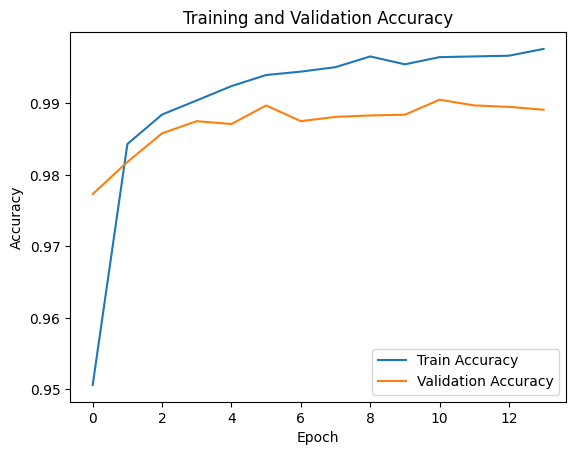

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

313/313 [==============================] - 8s 25ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



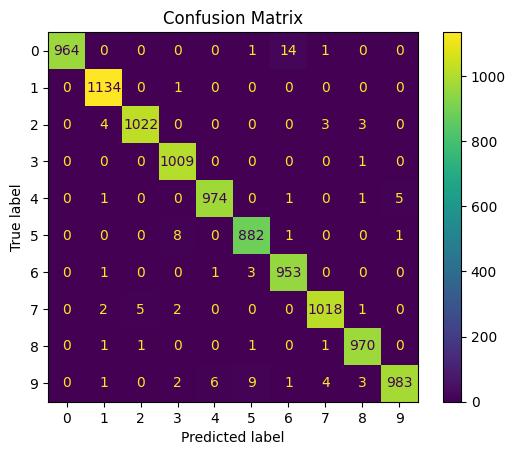

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


Podemos observar que os resultados foram excelentes superando bastante o modelo inicial e confirmando os estudos do Optuna.

# Análise final

A partir disso, pudemos praticar o uso do Optuna além de treinar um modelo Cnn com o tensorflow, obtendo um grande entendimento ao longo do processo e conseguindo com sucesso melhorar os resultados obtidos dos modelos após o aprimoramento dos parâmetros utilizados, com isso atingimos com sucesso nosso objetivo de evoluir um modelo com parâmetros mais apropriados.